# 17-9. 프로젝트 : 다양한 OCR모델 비교하기

- Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능 중
- (OCR 기능을 활용한 서비스를 개발할 때)어떤 모듈을 도입하면 좋을지 기술검증하는 프로젝트

## Step1. 검증용 데이터셋 준비

- OCR의 성능에 영향을 미치는 요인
    - 텍스트의 모양과 크기
    - 배치
    - 노이즈

여러분들은 위 3가지 기능들(Google OCR API, keras-ocr, Tesseract)이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 
recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 
이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

## Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

## Step4. 결과 분석과 결론 제시


    우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
    여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
    그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 1. 서비스 기획

 - 음료, 음식 등 원하는 어떤 메뉴 키워드를 입력하면,
 - 해당 키워드와 연관된 키워드를 검색하여 나오는
 - 주변 음식점, 카페 등의 리뷰 페이지의 사진 이미지 데이터를 크롤링 하여
 - 메뉴판 사진을 찾아 OCR 기능을 이용, 입력한 키워드에 해당하는 메뉴의 가격 및 메뉴의 설명 내용을 추출하여
 - 해당 메뉴를 제공하는 가게의 상호명, 위치, 메뉴의 가격, 메뉴의 이미지 사진등을 종합적으로 보여주는 서비스
    
    
 - OCR 기능은 메뉴판 이미지에서 메뉴의 가격 및 메뉴 설명 문구를 탐지하여 추출할 때 사용 





## 2. 모델 평가 기준

1. 기울어진 글자를 인식하는가?(메뉴판의 형태, 찍은 각도에 따라 글씨가 기울어질 수 있음)

2. 영어와 한국어, 숫자를 모두 인식을 잘 하는가?(메뉴는 한글,영어 모두 가능하고, 가격은 주로 숫자로 써져 있으므로)

3. 서로 다른 필체의 글자를 인식하는가?(메뉴판 마다 필체가 다양함)

## 모델 평가 기준에 따른 데이터 셋 수집

### 1. 기울어진 글자를 포함한 메뉴판 이미지

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# 1. 기울어진 글자 이미지

# dir_path_1 : 이미지 폴더 경로
dir_path_1 = os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_1'

file_list_1 = os.listdir(dir_path_1)

# 파일 이름 리스트 설정
print(file_list_1)

['6.jpeg', '4.jpeg', '3.jpeg', '1.jpg', '7.jpeg', '2.jpg', '5.jpeg']


In [3]:
file_list_1[0]

'6.jpeg'

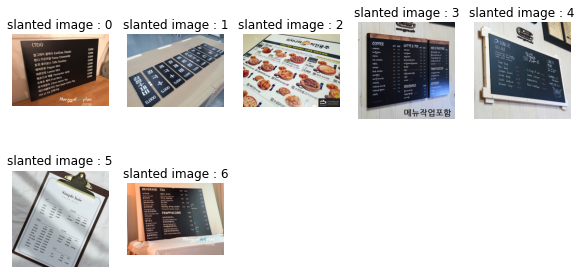

In [4]:
# 나타낼 프레임표시

# 이미지 절대 경로 저장할 히스트
image_list_1 = []

plt.figure(figsize=(10,5))

for i in range(7):
    image_list_1.append(os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_1/' + file_list_1[i])
    image = Image.open(image_list_1[i]) # 이미지 변수
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f'slanted image : {i}')
    plt.axis('off')
plt.show()

### 2. 영어, 숫자, 한글을 모두 포함한 메뉴판 이미지

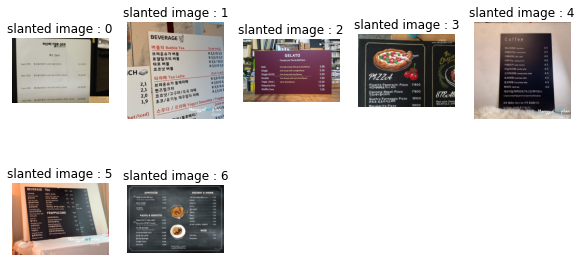

In [5]:
# 2. 영어, 숫자, 한글을 모두 포함한 메뉴판 이미지

# dir_path_1 : 이미지 폴더 경로
dir_path_2 = os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_2'

file_list_2 = os.listdir(dir_path_2)

# 이미지 절대 경로 저장할 히스트
image_list_2 = []

plt.figure(figsize=(10,5))

for i in range(7):
    image_list_2.append(os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_2/' + file_list_2[i])
    image = Image.open(image_list_2[i]) # 이미지 변수
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f'slanted image : {i}')
    plt.axis('off')
plt.show()

### 3. 필체가 다른 메뉴판 이미지

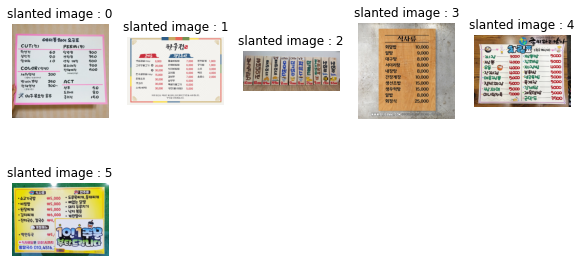

In [6]:
# 3. 필체가 다른 메뉴판 이미지

# dir_path_1 : 이미지 폴더 경로
dir_path_3 = os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_3'

file_list_3 = os.listdir(dir_path_3)

# 이미지 절대 경로 저장할 히스트
image_list_3 = []

plt.figure(figsize=(10,5))

for i in range(6):
    image_list_3.append(os.getenv('HOME') + '/aiffel/ocr_python/menu_image/testset_3/' + file_list_3[i])
    image = Image.open(image_list_3[i]) # 이미지 변수
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f'slanted image : {i}')
    plt.axis('off')
plt.show()

## 3. 평가 기준에 따른 테스트

### 3-1. Google Cloud Vision API 활용 코드

In [7]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [14]:
import os

# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 터미널 창에 $ export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json 입력
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 입력 이미지 경로를 지정해 주세요.
# ex.) '~/aiffel/ocr_python/test_image.png'


# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for i in range(7):
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(file_list_1[i])
    detect_text(image_list_1[i])
    
for i in range(7):
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(file_list_2[i])
    detect_text(image_list_2[i])
    
for i in range(6):
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(file_list_3[i])
    detect_text(image_list_3[i])


-rw-rw-r-- 1 aiffel0042 aiffel0042 2352 10월 13 10:51 /home/aiffel0042/aiffel/ocr_python/my_google_api_key.json
------------1번 이미지 OCR------------------
------------1번 이미지 OCR------------------
------------1번 이미지 OCR------------------
6.jpeg
Texts:

"(TEA)
얼그레이 클레식 EarlGrey Classic
(D)5200
(D)5200
(D)5200
펜시 카모마일 Fancy Chamomile
토피 루이보스 Toffe Rooibos
페퍼민트 Pepper Mint
(D)5200
(D)5200
레몬민트 Lemon Mint
(D)5200
페르디셔 애플 Persischer Apfel
(D)5200
프루트 베리 Fruit Berry
(D)5500
유자레몬티 Citron lemon Tea
레드애플유자타티 Red Apple Citron Tea
(D)5500
Hot or Ice 선택가능
Hangyul plan
"

"(TEA)"

"얼그레이"

"클레식"

"EarlGrey"

"Classic"

"(D)5200"

"(D)5200"

"(D)5200"

"펜시"

"카모마일"

"Fancy"

"Chamomile"

"토피"

"루이보스"

"Toffe"

"Rooibos"

"페퍼민트"

"Pepper"

"Mint"

"(D)5200"

"(D)5200"

"레몬"

"민트"

"Lemon"

"Mint"

"(D)5200"

"페르"

"디셔"

"애플"

"Persischer"

"Apfel"

"(D)5200"

"프루트"

"베리"

"Fruit"

"Berry"

"(D)5500"

"유자"

"레몬"

"티"

"Citron"

"lemon"

"Tea"

"레드"

"애플"

"유자"

"타티"

"Red"

"Apple"

"Citron"

"Tea"

"(D)55

Texts:

"BEVERAGE
버블티 Bubble Tea
브라운슈가 버블
로 얄밀크티 버블
타로 버블
(iced only)
R 3,5/G 5,0
R 3,5/G 5,0
R 3,5/ G5,0
R 3,5/G 5,0
ICH
코코넛 버블
티 라떼 Tea Latte
2,1
2,1
2,0
1,9
브라운슈가 돌체 라떼
퀸즈밀크티
코코넛/고구마/오곡 라떼
초코/유기농 제주 말차 라떼
(hot/iced)
R 3,0/G 4,0
R 3,0/G 4,
R 3,5/G 4.
R 2,5/G 3
스무디 / 프라페 Yogurt Smoothie / Frappe
(iced on
Hangyulartpiah/G
Thọt/iced)
T기/블루베리/
R 4,5/0
"

"BEVERAGE"

"버블티"

"Bubble"

"Tea"

"브라운"

"슈가"

"버블"

"로"

"얄"

"밀크티"

"버블"

"타로"

"버블"

"(iced"

"only)"

"R"

"3,5/G"

"5,0"

"R"

"3,5/G"

"5,0"

"R"

"3,5/"

"G5,0"

"R"

"3,5/G"

"5,0"

"ICH"

"코코넛"

"버블"

"티"

"라떼"

"Tea"

"Latte"

"2,1"

"2,1"

"2,0"

"1,9"

"브라운"

"슈가"

"돌체"

"라떼"

"퀸즈"

"밀크티"

"코코넛"

"/"

"고구마"

"/"

"오곡"

"라떼"

"초코"

"/"

"유기농"

"제주"

"말차"

"라떼"

"(hot/iced)"

"R"

"3,0/G"

"4,0"

"R"

"3,0/G"

"4,"

"R"

"3,5/G"

"4."

"R"

"2,5/G"

"3"

"스무디"

"/"

"프라페"

"Yogurt"

"Smoothie"

"/"

"Frappe"

"(iced"

"on"

"Hangyulartpiah/G"

"Thọt/iced)"

"T"

"기"

"/"

"블루"

"베리"

"/"

"R"

"4,5/0"
bounds: (479,495),(506,4

Texts:

"한국정은
고기류
전심특선
생삼겹살(150g)
된장찌개 1,000
돌솥비빔밥
산채비빔밥
8,000
7,000
고추장불고기 Φ 20,000
6,000
공기밥
1,000
낙지비빔밥
6,000
소주
3,000
솟 30,000
한우갈비살(150g) 15,000
김치찜
6,000
맥주
4,000
갈비탕
7,000
음료수
2,000
훈제오리
30,000
설렁탕
6,000
생오리
30,000
뚝배기불고기
6,000
수육(예약)
30,000
냉면(물/비빔)
5,000
저희 업소는 국내산 쌀,김치, 오리,돼지고기만을 사용합니니다.
정성을 다하겠습니I다.
"

"한국"

"정은"

"고기류"

"전심"

"특선"

"생"

"삼겹살"

"("

"150g"

")"

"된장"

"찌개"

"1,000"

"돌솥"

"비빔밥"

"산채"

"비빔밥"

"8,000"

"7,000"

"고추장"

"불고기"

"Φ"

"20,000"

"6,000"

"공기밥"

"1,000"

"낙지"

"비빔밥"

"6,000"

"소주"

"3,000"

"솟"

"30,000"

"한우"

"갈비살"

"("

"150g"

")"

"15,000"

"김치"

"찜"

"6,000"

"맥주"

"4,000"

"갈비탕"

"7,000"

"음료수"

"2,000"

"훈제"

"오리"

"30,000"

"설렁탕"

"6,000"

"생"

"오리"

"30,000"

"뚝배기"

"불고기"

"6,000"

"수육"

"("

"예약"

")"

"30,000"

"냉면"

"("

"물"

"/"

"비빔"

")"

"5,000"

"저희"

"업소"

"는"

"국내산"

"쌀"

","

"김치"

","

"오리"

","

"돼지"

"고기"

"만을"

"사용"

"합니"

"니다"

"."

"정성"

"을"

"다"

"하겠습니"

"I"

"다"

"."
bounds: (728,789),(739,789),(739,808),(728,808)
-------

결과(정상인식 : O / 잘못된 인식 포함 : X)

- 1. 기울어진 이미지
    - 1번 이미지: O
    - 2번 이미지: X
    - 3번 이미지: O
    - 4번 이미지: X
    - 5번 이미지: X
    - 6번 이미지: X
    - 7번 이미지: O
- Accuracy : 42.9%


- 2. 영문, 숫자, 한글 포함 이미지
    - 8번 이미지: O
    - 9번 이미지: O
    - 10번 이미지: O
    - 11번 이미지: O
    - 12번 이미지: O
    - 13번 이미지: O
    - 14번 이미지: O
- Accuracy : 100%


- 3. 서로 다른 필체 이미지
    - 15번 이미지: X
    - 16번 이미지: O
    - 17번 이미지: X
    - 18번 이미지: O
    - 19번 이미지: X
    - 20번 이미지: X
- Accuracy : 33.3%

### 3-2. keras-ocr

In [15]:
import keras_ocr


# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


In [38]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 

images_1 = [ keras_ocr.tools.read(j) for j in image_list_1]
prediction_groups_1 = [pipeline.recognize([j]) for j in image_list_1]

images_2 = [ keras_ocr.tools.read(j) for j in image_list_2]
prediction_groups_2 = [pipeline.recognize([j]) for j in image_list_2]

images_3 = [ keras_ocr.tools.read(j) for j in image_list_3]
prediction_groups_3 = [pipeline.recognize([j]) for j in image_list_3]

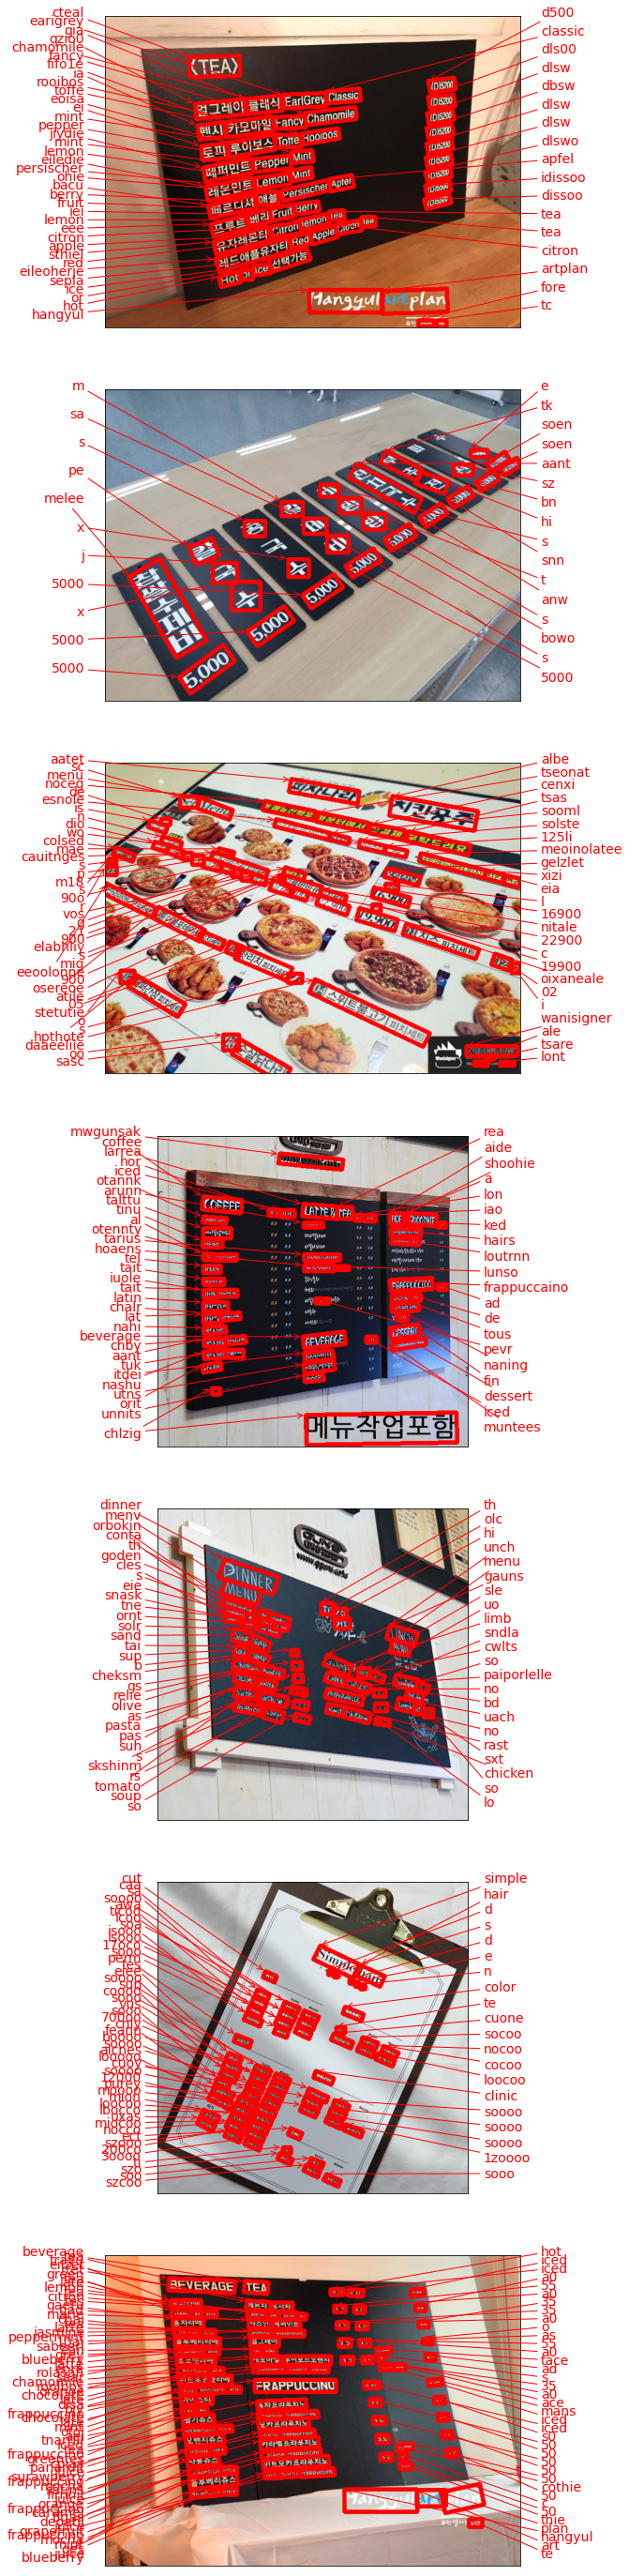

In [39]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images_1), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_1[idx], 
                                    predictions=prediction_groups_1[idx][0], ax=ax)

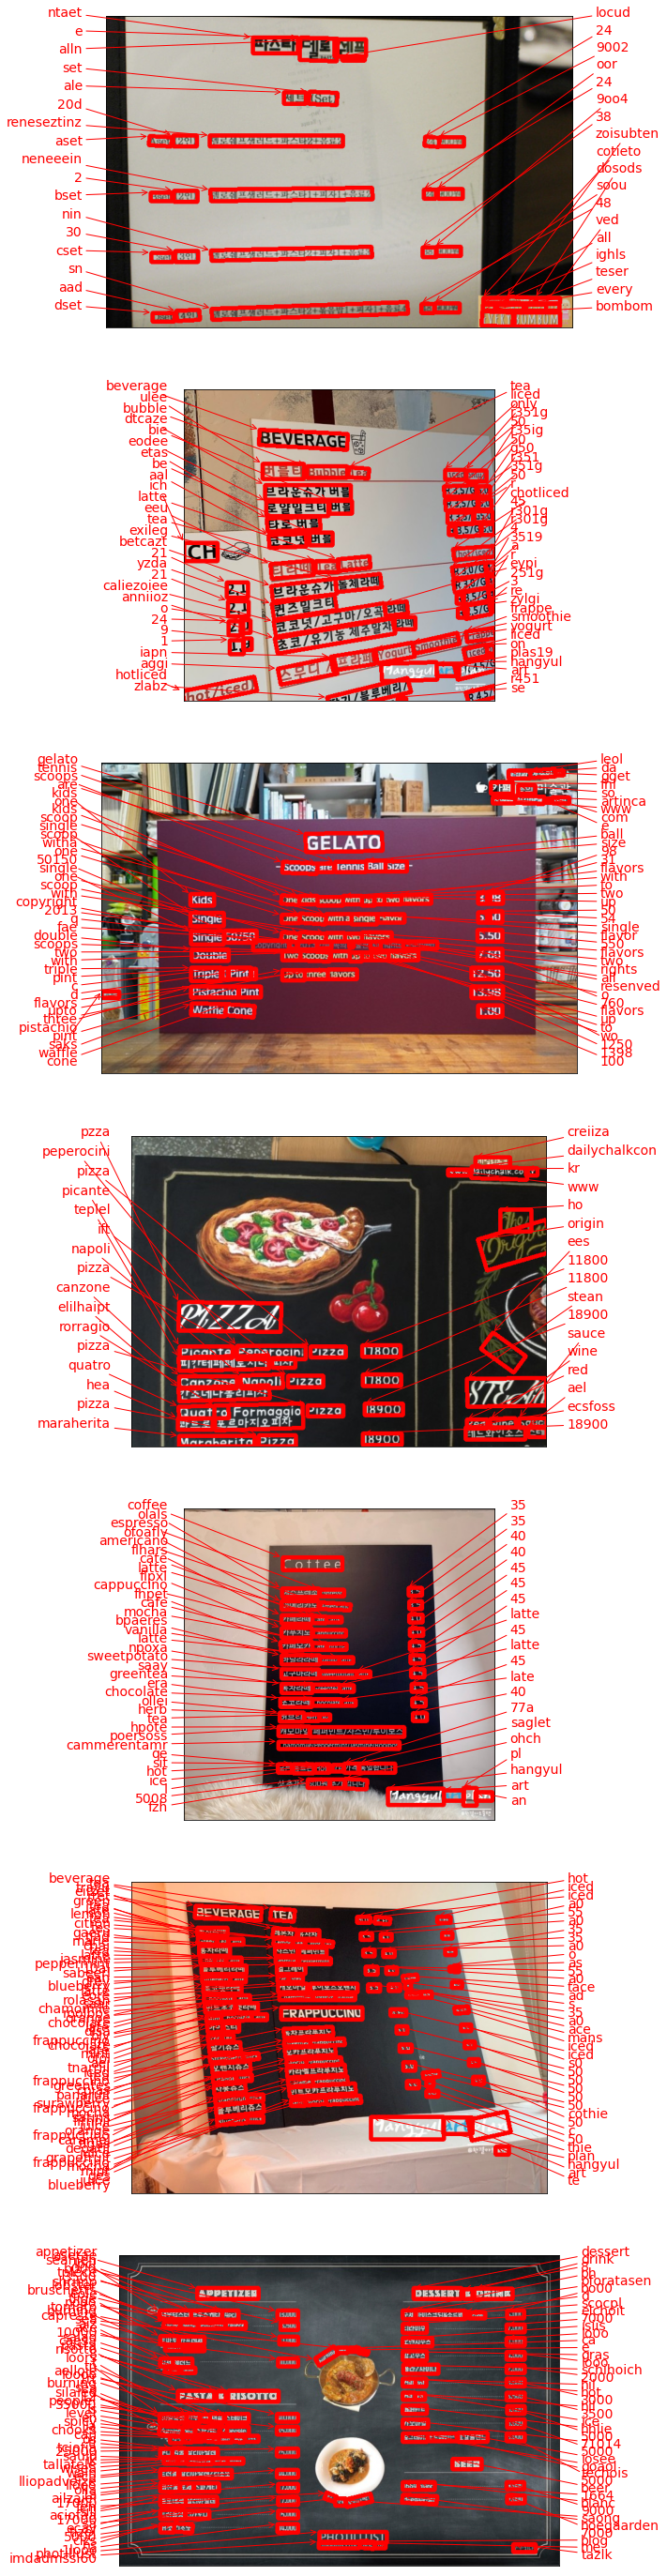

In [40]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images_2), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_2[idx], 
                                    predictions=prediction_groups_2[idx][0], ax=ax)

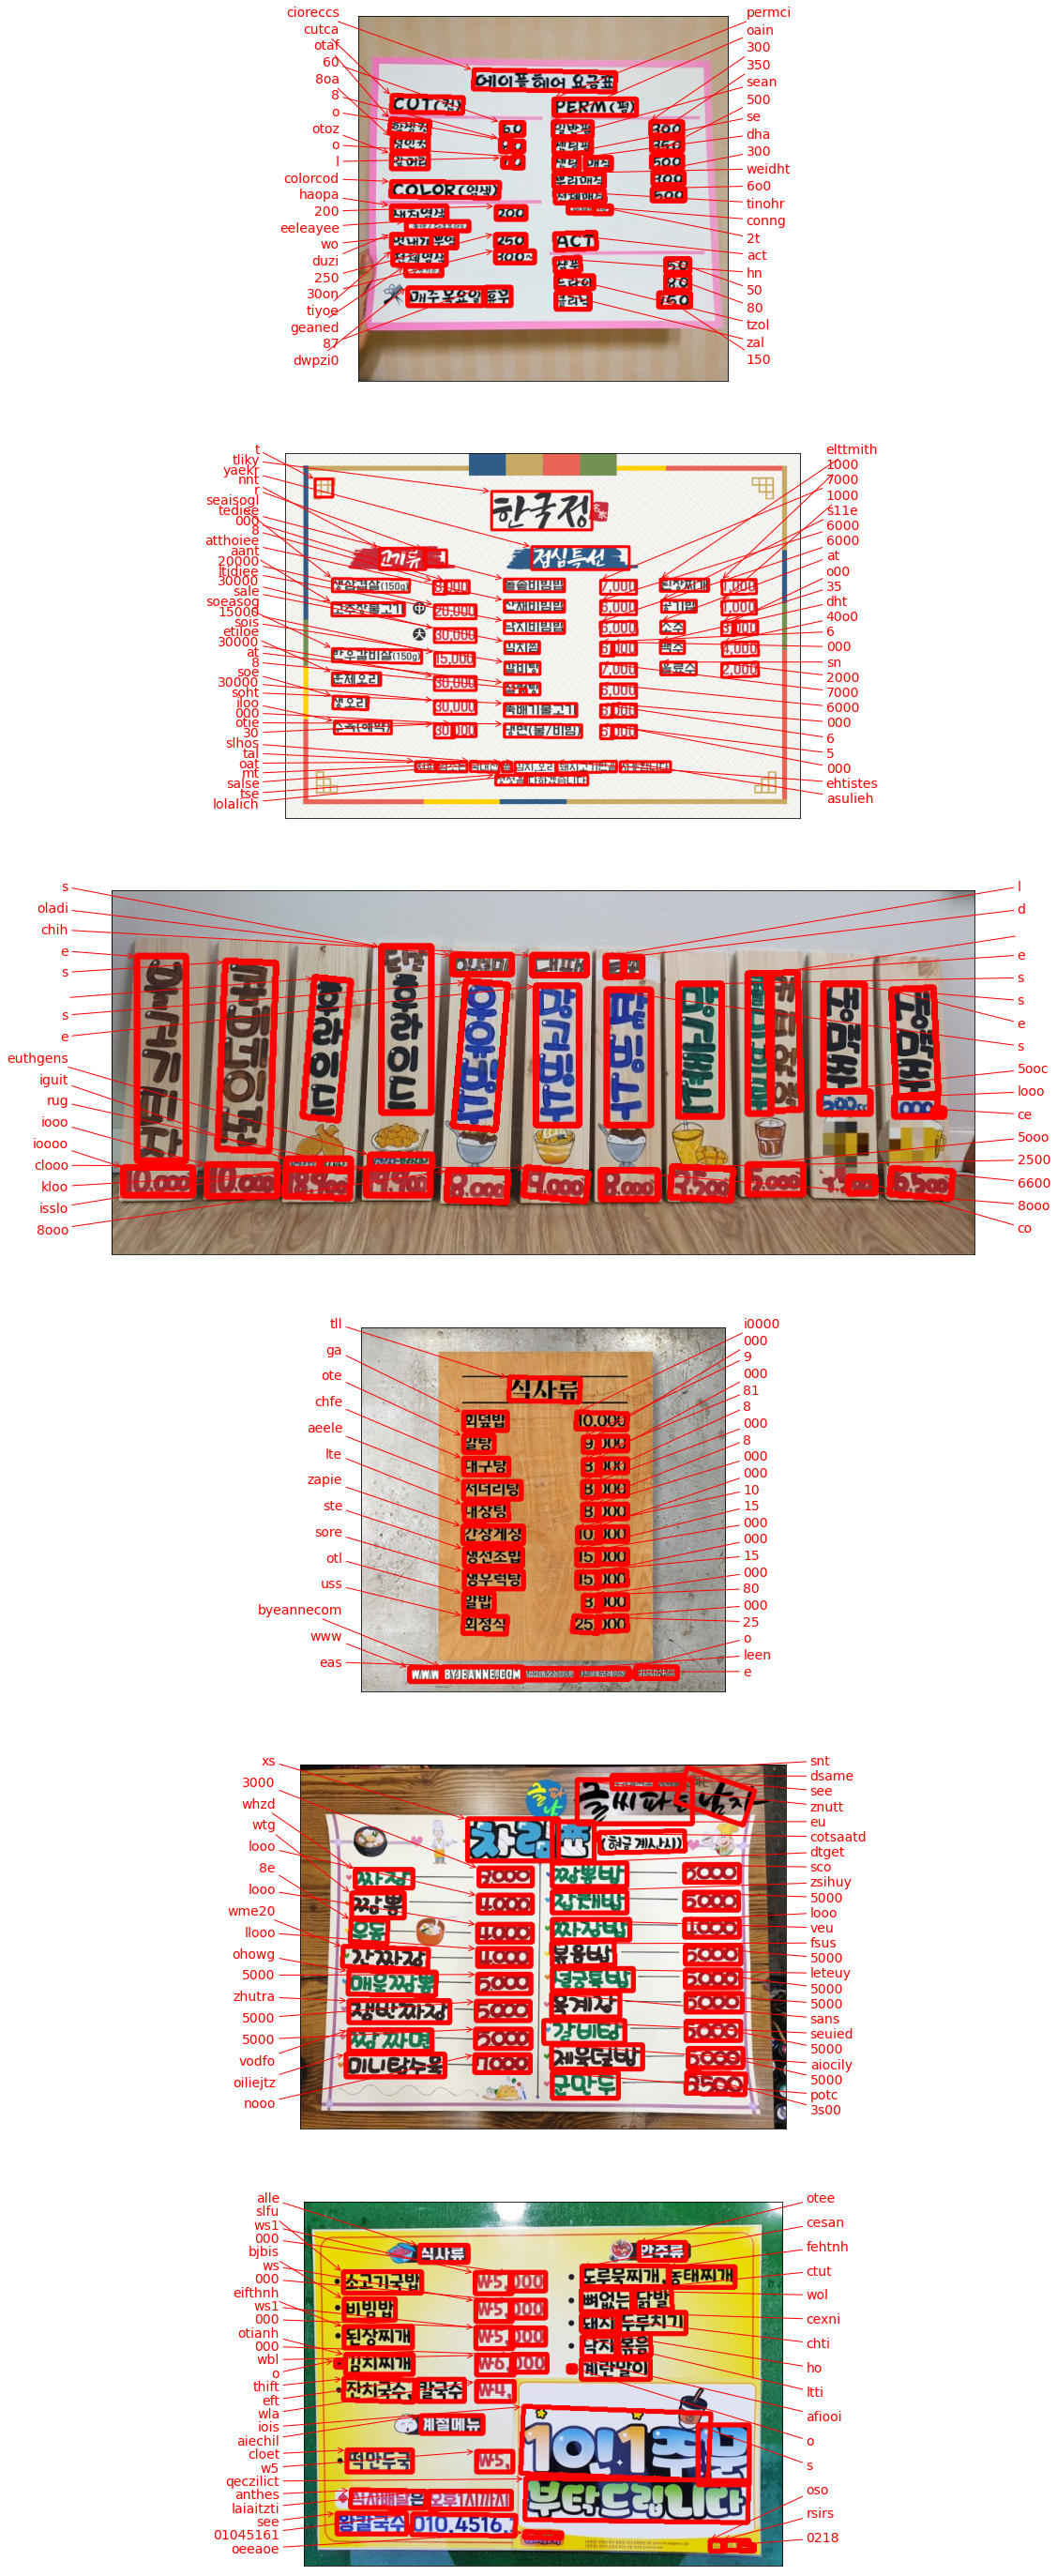

In [41]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images_3), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_3[idx], 
                                    predictions=prediction_groups_3[idx][0], ax=ax)

keras_OCR의 경우 한글을 인식하지 못하여, 
기준 1, 3에 대하여는 영어랑 숫자만으로 판정하였습니다.

결과(정상인식 : O / 잘못된 인식 포함 : X)


- 1. 기울어진 이미지
    - 1번 이미지: X
    - 2번 이미지: X
    - 3번 이미지: O
    - 4번 이미지: O
    - 5번 이미지: X
    - 6번 이미지: X
    - 7번 이미지: O
- Accuracy : 42.9%


- 2. 영문, 숫자, 한글 포함 이미지
    - 8번 이미지: X
    - 9번 이미지: X
    - 10번 이미지: X
    - 11번 이미지: X
    - 12번 이미지: X
    - 13번 이미지: X
    - 14번 이미지: X
- Accuracy : 0%(한글 인식 불가)

- 3. 서로 다른 필체 이미지
    - 15번 이미지: X
    - 16번 이미지: X
    - 17번 이미지: X
    - 18번 이미지: x
    - 19번 이미지: X
    - 20번 이미지: X
- Accuracy : 0 %(한글이 아닌 숫자에 대해서도 숫자 0을 알파벳 'o'로 읽는 등 오류 발생)

### 3-3. 테서랙트

In [42]:
import pytesseract
from pytesseract import Output

In [60]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list



work_dir_list = []
cropped_image_path_list_1 = []
cropped_image_path_list_2 = []
cropped_image_path_list_3 = []

for i in range(7):
    img_file_path = image_list_1[i]
    work_dir_list.append(os.getenv('HOME')+'/aiffel/ocr_python/tesseract_output/'+f'{i+1}')
    print(work_dir_list)
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir_list[i])
    cropped_image_path_list_1.append(cropped_image_path_list)
    
for i in range(7):
    img_file_path = image_list_2[i]
    work_dir_list.append(os.getenv('HOME')+'/aiffel/ocr_python/tesseract_output/'+f'{i+8}')
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir_list[i+7])
    cropped_image_path_list_2.append(cropped_image_path_list)
    
for i in range(6):
    img_file_path = image_list_3[i]
    work_dir_list.append(os.getenv('HOME')+'/aiffel/ocr_python/tesseract_output/'+f'{i+15}')
    cropped_image_path_list = crop_word_regions(img_file_path, work_dir_list[i+14])
    cropped_image_path_list_3.append(cropped_image_path_list)   

['/home/aiffel0042/aiffel/ocr_python/tesseract_output/1']
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0000.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0001.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0002.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0003.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0004.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0005.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0006.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0007.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0008.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0009.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0010.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0011.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0012.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0013.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/1/0014.p

['/home/aiffel0042/aiffel/ocr_python/tesseract_output/1', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/2', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/3', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/4', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/5', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/6']
/home/aiffel0042/aiffel/ocr_python/tesseract_output/6/0000.png
['/home/aiffel0042/aiffel/ocr_python/tesseract_output/1', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/2', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/3', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/4', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/5', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/6', '/home/aiffel0042/aiffel/ocr_python/tesseract_output/7']
/home/aiffel0042/aiffel/ocr_python/tesseract_output/7/0000.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/7/0001.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/7/0002.png
/home

/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0000.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0001.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0002.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0003.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0004.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0005.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0006.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0007.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0008.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0009.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0010.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0011.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0012.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0013.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/10/0014.png
/home/aiffel0042/aiffel/ocr_python/tesse

/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0000.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0001.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0002.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0003.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0004.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0005.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0006.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0007.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0008.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0009.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0010.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0011.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0012.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0013.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/14/0014.png
/home/aiffel0042/aiffel/ocr_python/tesse

/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0000.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0001.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0002.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0003.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0004.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0005.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0006.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0007.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0008.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0009.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0010.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0011.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0012.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0013.png
/home/aiffel0042/aiffel/ocr_python/tesseract_output/16/0014.png
/home/aiffel0042/aiffel/ocr_python/tesse

In [62]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor', 영어는 'eng'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [63]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.

for i in range(7):
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(f'------------{i+1}번 이미지 OCR------------------')
    print(file_list_1[i])
    recognize_images(cropped_image_path_list_1[i])
    
for i in range(7):
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(f'------------{i+8}번 이미지 OCR------------------')
    print(file_list_2[i])
    recognize_images(cropped_image_path_list_2[i])
    
for i in range(6):
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(f'------------{i+15}번 이미지 OCR------------------')
    print(file_list_3[i])
    recognize_images(cropped_image_path_list_3[i])

------------1번 이미지 OCR------------------
------------1번 이미지 OCR------------------
------------1번 이미지 OCR------------------
6.jpeg
,                              소

'                                                             0       | 경

서기 나


10080

|

'


(》

~

느니 선열

해나

페 시

0

트므별당 10

허이

1004

그"

루이보스

1011

개시

104

니케아

110!

104

거도

30 40

부6

이이

000

02

10

1.

、

가           2 으구니이 거아새수 을             0

고

그루트

| 0

0 여

0"

0 겨

이

아시

개

2

(1

1

바스 가

시

이서

1 1 1,

나

0

~ 후니

사사.

시

도안]

Done
------------2번 이미지 OCR------------------
------------2번 이미지 OCR------------------
------------2번 이미지 OCR------------------
4.jpeg
,                              소

'                                                             0       | 경

서기 나


10080

|

'


(》

~

느니 선열

해나

페 시

0

트므별당 10

허이

1004

그"

루이보스

1011

개시

104

니케아

110!

104

거도

30 40

부6

이이

000

02

10

1.

、




50

성비

= _

4상


- 0 0


미닝수욕- 7000


Done
------------20번 이미지 OCR------------------
------------20번 이미지 OCR------------------
------------20번 이미지 OCR------------------
19.jpeg
골드

(8 안주류

*소고기국밥

조

도무국찌]

1,중태퍼퍼

*비밍압

ㆍ뼈없는


70

대지

|

0

되상찌개

~

낙지

보음

성

끔치찌개

0

계란말이

ㆍ산치국수,

칼국수

@@ 게절메뉴

 트

Done


결과(정상인식 : O / 잘못된 인식 포함 : X)

- 1. 기울어진 이미지
    - 1번 이미지: X
    - 2번 이미지: X
    - 3번 이미지: X
    - 4번 이미지: X
    - 5번 이미지: X
    - 6번 이미지: X
    - 7번 이미지: x
- Accuracy : 0%


- 2. 영문, 숫자, 한글 포함 이미지
    - 8번 이미지: X
    - 9번 이미지: X
    - 10번 이미지: X
    - 11번 이미지: X
    - 12번 이미지: X
    - 13번 이미지: X
    - 14번 이미지: X
- Accuracy : 0%


- 3. 서로 다른 필체 이미지
    - 15번 이미지: X
    - 16번 이미지: X
    - 17번 이미지: X
    - 18번 이미지: X
    - 19번 이미지: X
    - 20번 이미지: X
- Accuracy : 0%

# 결론

* 평가 기준이었던 아래 3가지 항목에 대하여,

1. 기울어진 글자를 인식하는가?(메뉴판의 형태, 찍은 각도에 따라 글씨가 기울어질 수 있음)
2. 영어와 한국어, 숫자를 모두 인식을 잘 하는가?(메뉴는 한글,영어 모두 가능하고, 가격은 주로 숫자로 써져 있으므로)
3. 서로 다른 필체의 글자를 인식하는가?(메뉴판 마다 필체가 다양함)

각 모델별 정확도는
* Google OCR API : 42.9%, 100%, 33.3%

* keras-ocr : 42.9%, 0%, 0%

* Tesseract : 0%, 0%, 0%

로, 메뉴판 글자 인식을 이용한 서비스 개발 시, 가장 적절한 모델은

'Google OCR API' 모델이라 할 수 있다
